### 코드로 이해하는 딥러닝 

<img src = 'https://miro.medium.com/v2/resize:fit:828/format:webp/1*upfpVueoUuKPkyX3PR3KBg.png'>

###### _Image by <a href = 'https://towardsdatascience.com/whats-the-role-of-weights-and-bias-in-a-neural-network-4cf7e9888a0f'>What’s The Role Of Weights And Bias In a Neural Network?</a>_

In [1]:
import numpy as np

In [2]:
X = np.array([
  [0,0,1],
  [0,1,1],
  [1,0,1],
  [1,1,1]  #bias
])

#### Sigmoid 

입력값을 0과 1 사이의 값으로 압축시키는 함수

주로 이진 분류 문제에서 활성화 함수로 사용되거나, 로지스틱 회귀(Logistic Regression)와 같은 알고리즘에서 확률값을 예측하는 데에 이용

In [3]:
def sigmoid(x):
    return 1.0/(1.0 +np.exp(-x))

In [12]:
import matplotlib.pyplot as plt

In [25]:
x = np.linspace(-10,10,100)
y = sigmoid(x)

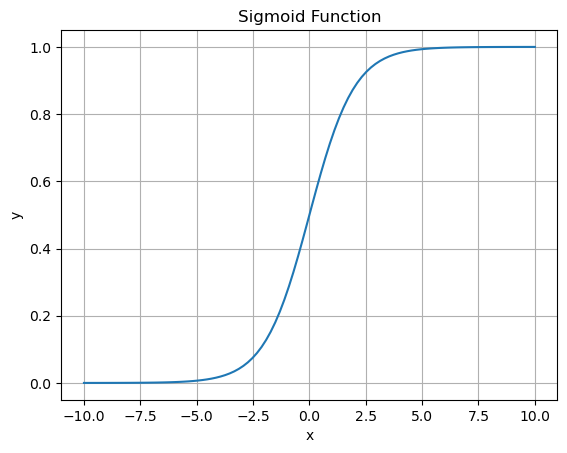

In [27]:
plt.plot(x, y)  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function')
plt.grid()
plt.show()

In [4]:
# 가중치 랜덤하게 선택 
W = 2*np.random.random((1,3))-2
W

array([[-0.98105322, -1.08203263, -1.11146272]])

### 순방향 연산

In [5]:
np.matmul(W, X[0])

array([-1.11146272])

In [6]:
N = 4

for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)

    print(y)

[0.24759829]
[0.10033613]
[0.10982636]
[0.04013482]


위 연산의 가중치는 random 하게 뽑은 것이므로 y 값은 아무 의미가 없다.

가중치가 정답을 맞추도록 학습하는 과정이 필요하다.

### Deep Learning Workflow 

<img src = 'https://content.codecademy.com/courses/deeplearning-with-tensorflow/Workflow/Workflow.png' width = 800>

###### _Image by <a href = 'https://www.codecademy.com/article/deep-learning-workflow'>Deep Learning Workflow</a>_

### 지도학습 

In [28]:
# 타겟 변수 D 
D = np.array([
    [0], [0], [1], [1]
])

In [30]:
# output 계산 함수
def calc_output(W, x):
    v = np.matmul(W, x)
    y = sigmoid(v)

    return y

In [31]:
# 오차 계산 함수 
def calc_error(d, y):
    e = d - y # 오차 계산
    delta = y * (1-y) *e # error 와 활섬화 함수의 미분값

    return delta

### Gradient Descent
미분의 개념을 최적화 문제에 적용한 대표적 방법 중 하나로서 함수의 local minimum을 찾는 방법 중 하나이다. 

이와 같이 어떤 함수의 극대점을 찾기 위해 현재 위치에서의 gradient 방향으로 이동해 가는 방법을 gradient ascent 방법, **극소점을 찾기 위해 gradient 반대 방향으로 이동해 가는 방법을 gradient descent 방법**이라 부릅니다

기울기의 값이 크다는 것은 가파르다는 것을 의미하기도 하지만, 또 한편으로는 $x$ 의 위치가 최소값/최댓값에 해당되는 $x$ 좌표로부터 멀리 떨어져있는 것을 의미하기도 한다. 

특정 포인트 $x$ 에서 $x$ 가 커질 수록 함수값이 커지는 중이라면 (즉, 기울기의 부호는 양수) 음의 방향으로 
$x$ 를 옮겨야 할 것이고, 반대로 특정 포인트 $x$ 에서 $x$ 가 커질 수록 함수값이 작아지는 중이라면 (즉, 기울기의 부호는 음수) 양의 방향으로 $x$를 옮기면 된다.

<img src = 'https://adatis.co.uk/wp-content/uploads/GradientDescentGIF.gif' width = 600>

###### _Image by <a href = 'https://adatis.co.uk/introduction-to-artificial-neural-networks-part-two-gradient-descent-backpropagation-supervised-unsupervised-learning/'>Introduction to Artificial Neural Networks part two</a>_


#### 한 epoch에 수행되는 W 계산 

<img src = 'https://t1.daumcdn.net/cfile/tistory/99EC803359D86AF115'>


###### _Image by <a href = 'https://seamless.tistory.com/38'>딥러닝(Deep learning) 살펴보기 2탄</a>_


In [33]:
def delta_GD(W, X, D, step_size): # step_size : Learning rate
    for k in range(len(X)):
        x = X[k,:].T
        d = D[k]

        y = calc_output(W, x)
        delta = calc_error(d, y)

        dW = step_size*delta*x 
        W = W+dW

        return W
    

In [34]:
step_size = 0.9

for epoch in range(10000):
    W = delta_GD(W, X, D, step_size)
    print(W)

[[-0.98105322 -1.08203263 -1.15297605]]
[[-0.98105322 -1.08203263 -1.19235949]]
[[-0.98105322 -1.08203263 -1.22979078]]
[[-0.98105322 -1.08203263 -1.26542897]]
[[-0.98105322 -1.08203263 -1.29941658]]
[[-0.98105322 -1.08203263 -1.33188154]]
[[-0.98105322 -1.08203263 -1.36293887]]
[[-0.98105322 -1.08203263 -1.39269222]]
[[-0.98105322 -1.08203263 -1.42123513]]
[[-0.98105322 -1.08203263 -1.44865224]]
[[-0.98105322 -1.08203263 -1.47502028]]
[[-0.98105322 -1.08203263 -1.50040896]]
[[-0.98105322 -1.08203263 -1.52488172]]
[[-0.98105322 -1.08203263 -1.54849646]]
[[-0.98105322 -1.08203263 -1.57130607]]
[[-0.98105322 -1.08203263 -1.59335903]]
[[-0.98105322 -1.08203263 -1.61469978]]
[[-0.98105322 -1.08203263 -1.63536921]]
[[-0.98105322 -1.08203263 -1.65540496]]
[[-0.98105322 -1.08203263 -1.67484175]]
[[-0.98105322 -1.08203263 -1.69371169]]
[[-0.98105322 -1.08203263 -1.71204449]]
[[-0.98105322 -1.08203263 -1.72986768]]
[[-0.98105322 -1.08203263 -1.74720686]]
[[-0.98105322 -1.08203263 -1.76408579]]


In [36]:
for k in range(4):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)

    print(y)

[0.00756224]
[0.00257577]
[0.00284867]
[0.00096725]


### XOR - 오차의 역전파 

In [39]:
X = np.array([[0,0,1],
             [0,1,1],
             [1,0,1],
             [1,1,0]])

D = np.array([[0], [1], [1], [0]])

W = 2*np.random.random((1, 3))-1 

In [40]:
step_size = 0.9

for epoch in range(10000):
    W = delta_GD(W, X, D, step_size)
    print(W)

[[-0.51340032  0.89381395 -0.79703765]]
[[-0.51340032  0.89381395 -0.85691267]]
[[-0.51340032  0.89381395 -0.91301452]]
[[-0.51340032  0.89381395 -0.96568934]]
[[-0.51340032  0.89381395 -1.0152501 ]]
[[-0.51340032  0.89381395 -1.06197818]]
[[-0.51340032  0.89381395 -1.1061257 ]]
[[-0.51340032  0.89381395 -1.14791818]]
[[-0.51340032  0.89381395 -1.18755718]]
[[-0.51340032  0.89381395 -1.22522292]]
[[-0.51340032  0.89381395 -1.26107666]]
[[-0.51340032  0.89381395 -1.29526289]]
[[-0.51340032  0.89381395 -1.32791124]]
[[-0.51340032  0.89381395 -1.35913827]]
[[-0.51340032  0.89381395 -1.38904896]]
[[-0.51340032  0.89381395 -1.41773806]]
[[-0.51340032  0.89381395 -1.44529125]]
[[-0.51340032  0.89381395 -1.4717862 ]]
[[-0.51340032  0.89381395 -1.49729345]]
[[-0.51340032  0.89381395 -1.52187719]]
[[-0.51340032  0.89381395 -1.54559596]]
[[-0.51340032  0.89381395 -1.56850327]]
[[-0.51340032  0.89381395 -1.5906481 ]]
[[-0.51340032  0.89381395 -1.61207538]]
[[-0.51340032  0.89381395 -1.63282643]]


#### Weight 를 임의로 설정했기 때문에 결과가 엉망으로 나온다

In [41]:
for k in range(4):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)

    print(y)

[0.00756498]
[0.01829221]
[0.00454111]
[0.59397286]


### MLP 형태로 함수 생성 

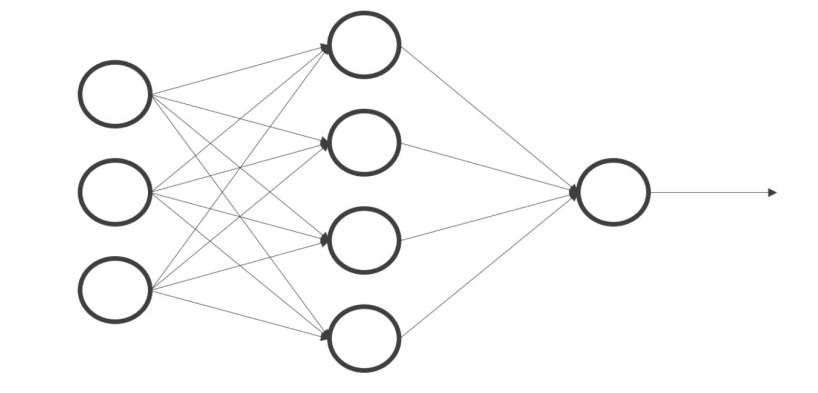

In [46]:
def calc_output(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    return y,  y1
    
   

<img src = 'https://editor.analyticsvidhya.com/uploads/18870backprop2.png'>

###### _Image by <a href='https://www.analyticsvidhya.com/blog/2023/01/gradient-descent-vs-backpropagation-whats-the-difference/' >Gradient Descent vs. Backpropagation: What’s the Difference?</a>_

In [43]:
# 출력층의 델타 계산 함수 
def calc_delta(d, y):
    e = d - y # 오차 계산
    delta = y * (1-y) *e # error 와 활섬화 함수의 미분값

    return delta

In [44]:
# 은닉층의 델타 계산 함수 
def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1 * (1-y1) *e1 # error 와 활섬화 함수의 미분값

    return delta1

In [47]:
# 역전파 코드 
def backprop_XOR(W1, W2, X, D, step_size):
    for k in range(len(X)):
        x = X[k, :].T
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)

        dW1 = (step_size*delta1).reshape(4, 1) * x.reshape(1,3)
        W1 = W1 + dW1

        dW2 = step_size*delta * y1
        W2 = W2+dW2

    return W1, W2




In [48]:
W1 = 2*np.random.random((4,3))-1 
W2 = 2*np.random.random((1,4))-1 

In [49]:
step_size = 0.9

for epoch in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, step_size)
    print(W)

[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]


#### 유의미한 결과 생성 

In [54]:
for k in range(len(X)):
    x = X[k, :].T
    print(calc_output(W1, W2, x)[0])

[0.01043807]
[0.98921155]
[0.98925808]
[0.01075417]


### Cross Entropy

In [59]:
def calc_delta_ce(d, y):
    e = d - y
    delta = e
    return delta

In [60]:
def calc_delta1_ce(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1)*e1 

    return delta1

In [61]:
def backprop_ce(W1, W2, X, D, step_size):
    for k in range(len(X)):
        x = X[k, :].T
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta_ce(d, y)
        delta1 = calc_delta1_ce(W2, delta, y1)

        dW1 = (step_size*delta1).reshape(4,1) * x.reshape(1,3)
        W1 = W1 + dW1
        dW2 = step_size*delta*y1
        W2 = W2 + dW2
    return W1, W2

In [62]:
W1 = 2*np.random.random((4,3))-1 
W2 = 2*np.random.random((1,4))-1 

In [63]:
step_size = 0.9

for epoch in range(10000):
    W1, W2 = backprop_ce(W1, W2, X, D, step_size)
    print(W)

[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]
[[-0.51340032  0.89381395 -4.87663245]]


#### 활성화 함수를 Cross Entropy를 사용했을 때 성능이 훨씬 좋아짐 

In [64]:
for k in range(len(X)):
    x = X[k, :].T
    print(calc_output(W1, W2, x)[0])

[0.00010441]
[0.99982668]
[0.99982279]
[0.00022226]


In [66]:
import numpy as np
import matplotlib.pyplot as plt 

### SoftMax Function

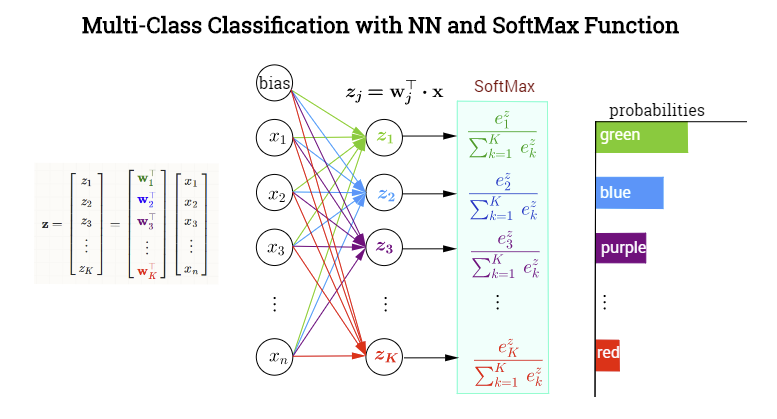

###### _Image by <a href = 'https://rinterested.github.io/statistics/softmax.html'>Softmax Activation</a>_

이진 분류문제가 아닌, 다중 분류를 해결하기 위한 모델을 제안한 것이 바로 소프트맥스 함수이다. 

소프트맥스 함수는 여러 개의 연산 결과를 정규화하여 모든 클래스의 확률값의 합을 1로 만들자는 간단한 아이디어다. 


In [67]:
def soft_max(x):
    x = np.subtract(x, np.max(x))
    ex = np.exp(x)

    return ex/np.sum(ex)

In [69]:
X=np.zeros((5,5,5))

X[:, :, 0] = [ [0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 0]]
X[:, :, 1] = [ [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [1, 1, 1, 1, 1]]
X[:, :, 2] = [ [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]
X[:, :, 3] = [ [0, 0, 0, 1, 0], [0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0]]
X[:, :, 4] = [ [1, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]

In [70]:
D = np.array([
    [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]
])

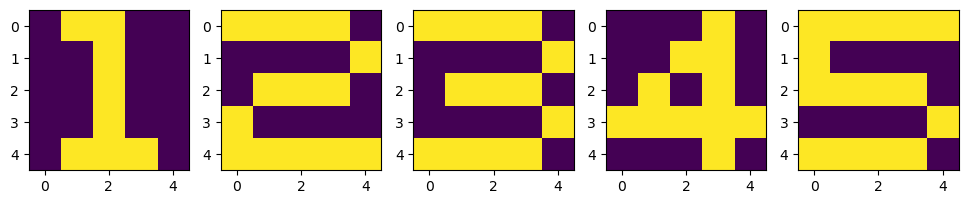

In [73]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])

plt.show()

In [74]:
def ReLu(x):
    return np.maximum(0, x)

In [76]:
def calc_ReLu(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLu(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLu(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLu(v3)
    v = np.matmul(W4, y3)
    y = soft_max(v)

    return y, v1, v2, v3, y1, y2, y3